In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('files/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


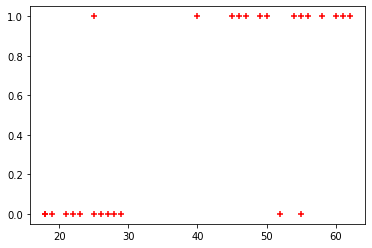

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red');

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [6]:
X_test

,age
15,55
10,18
12,27


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
pred = model.predict(X_test)
pred

array([1, 0, 0], dtype=int64)

In [9]:
y_test

15    1
10    0
12    0
Name: bought_insurance, dtype: int64

In [10]:
model.score(X_test, y_test)  # accuracy

1.0

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

1.0

predicting probabilities instead of classes

In [12]:
model.predict_proba(X_test)

array([[0.11113401, 0.88886599],
       [0.92855992, 0.07144008],
       [0.80770369, 0.19229631]])

In [13]:
model.predict([[25]]), model.predict([[56]])  # predictions for two new observations with age 25 and 56

(array([0], dtype=int64), array([1], dtype=int64))

# exercise

In [14]:
data = pd.read_csv('files/HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [17]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

## average feature values based on *left* label

In [18]:
data.groupby('left').mean() # only takes the numeric features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


main insights:
- employees leaving the firm show, on average, a lower satisfaction level
- employees leaving the firm work, on average, an higher amount of hours per month compared to those who do not leave
- employees having promotions are more likely to stay

## correlations between variables

In [19]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

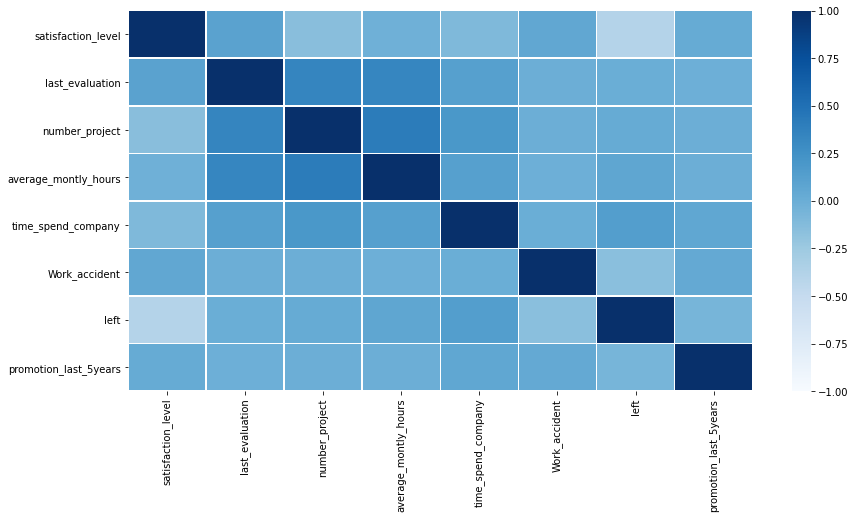

In [20]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(data.corr(), linewidths=.5, vmin=-1, vmax=1, cmap='Blues')

the higher correlation with the company's abandonment is given by the satisfaction level, and is an inverse correlation.\
The lower the satisfaction level, the higher the probability that an employee left the company.

## looking at impact of salary on employee retention

<AxesSubplot:xlabel='salary', ylabel='left'>

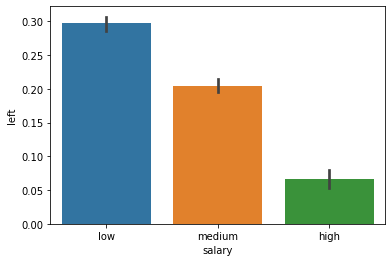

In [21]:
sns.barplot(x='salary', y='left', data=data)

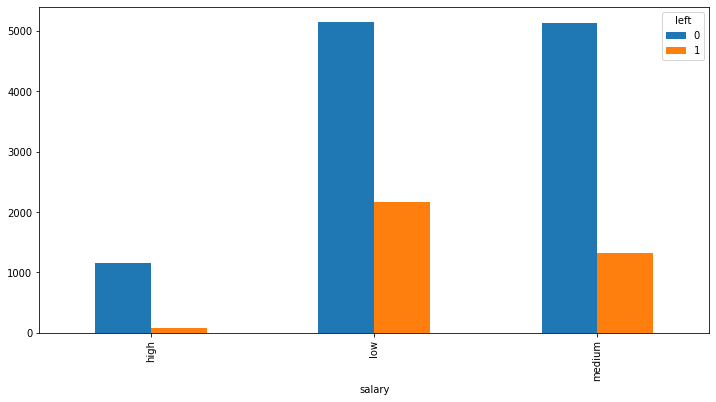

In [27]:
pd.crosstab(data.salary,data.left).plot(kind='bar', figsize=(12,6));

we see that employees with high salaries do not usually leave the company

## looking at impact of department on employee retention

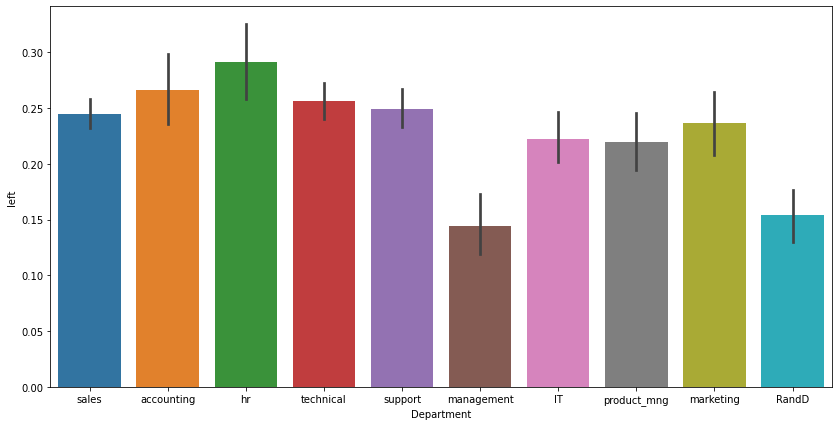

In [28]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(x='Department', y='left', data=data);

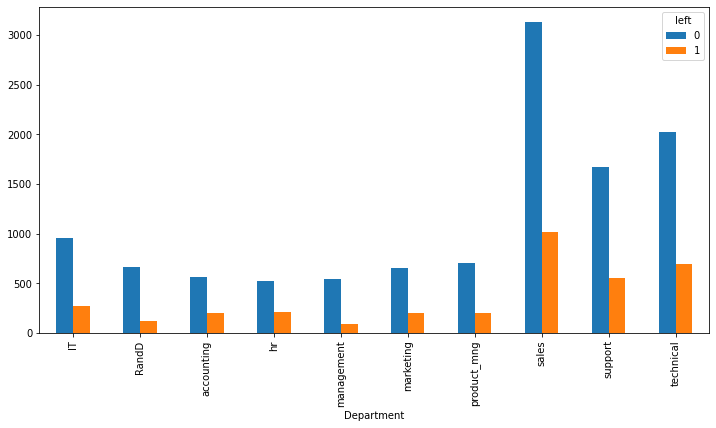

In [29]:
pd.crosstab(data.Department,data.left).plot(kind='bar', figsize=(12, 6));

there seems to be a minor impact of department on retetion

## removing not useful features

In [30]:
data = data.drop(['last_evaluation', 'number_project', 'promotion_last_5years', 'average_montly_hours'], axis=1)
data

,satisfaction_level,time_spend_company,Work_accident,left,Department,salary
0,0.38,3,0,1,sales,low
1,0.80,6,0,1,sales,medium
2,0.11,4,0,1,sales,medium
3,0.72,5,0,1,sales,low
4,0.37,3,0,1,sales,low
...,...,...,...,...,...,...
14994,0.40,3,0,1,support,low
14995,0.37,3,0,1,support,low
14996,0.37,3,0,1,support,low
14997,0.11,4,0,1,support,low


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  14999 non-null  float64
 1   time_spend_company  14999 non-null  int64  
 2   Work_accident       14999 non-null  int64  
 3   left                14999 non-null  int64  
 4   Department          14999 non-null  object 
 5   salary              14999 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 703.2+ KB


## handling categorical variables
creating dummy variables for categorical features *Department* and *salary*

In [33]:
dummies = pd.get_dummies(data[['Department', 'salary']])
dummies.head(3)

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
merged = pd.concat([data, dummies], axis='columns')
merged

,satisfaction_level,time_spend_company,Work_accident,left,Department,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,3,0,1,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,6,0,1,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,4,0,1,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,5,0,1,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,3,0,1,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,3,0,1,support,low,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,3,0,1,support,low,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,3,0,1,support,low,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,4,0,1,support,low,0,0,0,0,0,0,0,0,1,0,0,1,0


In [38]:
to_remove = ['Department', 'salary']
data = merged.drop(to_remove, axis=1)
data

,satisfaction_level,time_spend_company,Work_accident,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
final = data.drop(['Department_IT', 'salary_high'], axis='columns')  # removing the original categorical features
final

,satisfaction_level,time_spend_company,Work_accident,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,3,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,6,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,4,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,5,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,3,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,4,0,1,0,0,0,0,0,0,0,1,0,1,0


## training and testing data

In [40]:
X = final.drop('left', axis=1)
y = final.left

In [41]:
X

,satisfaction_level,time_spend_company,Work_accident,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,3,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,6,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,4,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,5,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,3,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,3,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,3,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,3,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,4,0,0,0,0,0,0,0,0,1,0,1,0


In [55]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## applying Model

In [57]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [58]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test, pred)

0.774

In [60]:
lr.score(X_test, y_test)  # same thing

0.774